In [5]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np

LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2025-02-03 18:17:00,027 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:81:8D:26:04:64
2025-02-03 18:17:02,963 | INFO     |: Connected to C0:81:8D:26:04:64


## Echo Command

In [91]:
ble.send_command(CMD.ECHO, "Hello World")

In [92]:
s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

Robot says -> Hello World :)


## Send 3 Floats command

In [93]:
ble.send_command(CMD.SEND_THREE_FLOATS, "2.71828|3.14159|6.28")

## Get Time Millis Command

In [94]:
ble.send_command(CMD.GET_TIME_MILLIS, "")
s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

T:18015


## Time Notification Handler

In [102]:
def time_notification_handler(uuid, bytearr):
    timestr = ble.bytearray_to_string(bytearr)
    milli = timestr.split("T:")[1]
    print(milli)


ble.start_notify(ble.uuid['RX_STRING'], time_notification_handler)

In [96]:
ble.send_command(CMD.GET_TIME_MILLIS, "")

20063


In [128]:
#optional to stop notifications
ble.stop_notify(ble.uuid['RX_STRING'])

## Looping Time

In [104]:
ble.send_command(CMD.START_TIME_LOOP, "")

79297
79299
79300
79307
79325
79331
79360
79361
79386
79388
79419
79446
79448
79481
79482
79508
79540
79541
79565
79575
79597
79632
79633
79635
79658
79693
79695
79720
79721
79751
79779
79781
79814
79815
79837
79873
79875
79902
79903
79929
79959
79961
79988
79990
80023
80052
80053
80083
80085
80111
80141
80143
80174
80175
80197
80232
80234
80265
80266
80289
80325
80326
80328
80351
80378
80380
80413
80414
80439
80472
80473
80501
80502
80534
80564
80566
80593
80595
80622
80650
80652
80686
80688
80715
80741
80743
80777
80779
80803
80833
80835
80859
80868
80892
80919
80927
80929
80957
80987
80989
81013
81015
81040
81076
81078
81105
81107
81132
81168
81170
81195
81196
81221
81255
81257
81286
81287
81313
81342
81343
81378
81380
81402
81437
81439
81464
81465
81496
81523
81525
81559
81561
81588
81618
81620
81645
81646
81671
81704
81705
81739
81740
81766
81796
81798
81822
81831
81855
81882
81891
81892
81920
81945
81947
81980
81981
82003
82039
82041
82070
82072
82096
82131
82133
82158
82159
8219

## Time Stamp Array

In [120]:
#Prompt recording data from loop
ble.send_command(CMD.START_TIME_LOOP, "")

In [121]:
time_list = []

def time_array_handler(uuid, bytearr):
    timestr = ble.bytearray_to_string(bytearr)
    milli = timestr.split("T:")[1]
    time_list.append(milli)


ble.start_notify(ble.uuid['RX_STRING'], time_array_handler)
#Send the time data array
ble.send_command(CMD.SEND_TIME_DATA, "")

In [110]:
print(time_list)
print(len(time_list))

['533871', '533871', '533871', '533871', '533871', '533871', '533871', '533871', '533871', '533871', '533871', '533871', '533871', '533871', '533871', '533871', '533871', '533871', '533871', '533871', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533872', '533873', '533873', '533873', '533873', '533873', '533873', '533873', '533873', '533873', '533873', '533873', '533873', '533873', '533873', '533873', '533873', '533873', '533873', '533873', '533873', '533873', '533873', '533873', '533873', '533873', '533873', '533873', '533873', '533874', '533874', '533874', '533874', '533874', '533874', '533874', '533874', '533874', '533874', '533874', '533874', '533874', '533874', '533874', '533874', '533874', '533874', '533874', '533874', '533874', '533874',

## Temperatures with Time Stamps

In [153]:
#Prompt recording data from loop
ble.send_command(CMD.START_TIME_LOOP, "")

In [154]:
time_list = []
temp_list = []

def time_array_handler(uuid, bytearr):
    timetemp = ble.bytearray_to_string(bytearr)
    arr = timetemp.split("Time:")[1] #Split time and temperature in message
    time, temp = arr.split("Temp:")
    time_list.append(time)
    temp_list.append(temp)


ble.start_notify(ble.uuid['RX_STRING'], time_array_handler)
#Send the time data array
ble.send_command(CMD.GET_TEMP_READINGS, "")

In [155]:
print("Time Array:", time_list, "\n Time array length", len(time_list))
print("Temp Array:", temp_list, "\n Temp array length", len(temp_list))

Time Array: ['194245', '194245', '194245', '194245', '194246', '194246', '194246', '194246', '194246', '194246', '194246', '194246', '194246', '194247', '194247', '194247', '194247', '194247', '194247', '194247', '194247', '194247', '194248', '194248', '194248', '194248', '194248', '194248', '194248', '194249', '194249', '194249', '194249', '194249', '194249', '194249', '194249', '194249', '194250', '194250', '194250', '194250', '194250', '194250', '194250', '194250', '194250', '194251', '194252', '194252', '194252', '194252', '194252', '194252', '194252', '194253', '194253', '194253', '194253', '194253', '194253', '194253', '194253', '194253', '194254', '194254', '194254', '194254', '194254', '194254', '194254', '194254', '194255', '194255', '194255', '194255', '194255', '194255', '194255', '194255', '194255', '194256', '194256', '194256', '194256', '194256', '194256', '194256', '194256', '194256', '194257', '194257', '194257', '194257', '194257', '194257', '194257', '194257', '194258

In [24]:
#optional to stop notifications
ble.stop_notify(ble.uuid['RX_STRING'])

## Byte Overhead

In [25]:
start_time = 0
times = []
def var_byte_handler(uuid, bytearr):
    print(bytearr)
    print(len(ble.bytearray_to_string(bytearr)), "Bytes, ", end="")
    cur_time = time.time()
    comm_time = cur_time - start_time
    print("Time For Request: ", comm_time)
    times.append(comm_time)


ble.start_notify(ble.uuid['RX_STRING'], var_byte_handler)


In [26]:
ble.send_command(CMD.INIT_VAR, "5")
time.sleep(1)
start_time = time.time()
ble.send_command(CMD.VAR_BYTE_RESPONSE, "")

bytearray(b'aaaaa')
5 Bytes, Time For Request:  0.07486987113952637


In [27]:
ble.send_command(CMD.INIT_VAR, "20")
time.sleep(1)
start_time = time.time()
ble.send_command(CMD.VAR_BYTE_RESPONSE, "")

bytearray(b'aaaaaaaaaaaaaaaaaaaa')
20 Bytes, Time For Request:  0.07637286186218262


In [28]:
ble.send_command(CMD.INIT_VAR, "40")
time.sleep(1)
start_time = time.time()
ble.send_command(CMD.VAR_BYTE_RESPONSE, "")

bytearray(b'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa')
40 Bytes, Time For Request:  0.07563495635986328


In [29]:
ble.send_command(CMD.INIT_VAR, "60")
time.sleep(1)
start_time = time.time()
ble.send_command(CMD.VAR_BYTE_RESPONSE, "")

bytearray(b'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa')
60 Bytes, Time For Request:  0.07706689834594727


In [30]:
ble.send_command(CMD.INIT_VAR, "80")
time.sleep(1)
start_time = time.time()
ble.send_command(CMD.VAR_BYTE_RESPONSE, "")

bytearray(b'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa')
80 Bytes, Time For Request:  0.0775308609008789


In [31]:
ble.send_command(CMD.INIT_VAR, "100")
time.sleep(1)
start_time = time.time()
ble.send_command(CMD.VAR_BYTE_RESPONSE, "")

bytearray(b'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa')
100 Bytes, Time For Request:  0.1086580753326416


In [32]:
ble.send_command(CMD.INIT_VAR, "120")
time.sleep(1)
start_time = time.time()
ble.send_command(CMD.VAR_BYTE_RESPONSE, "")

bytearray(b'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa')
120 Bytes, Time For Request:  0.08358502388000488


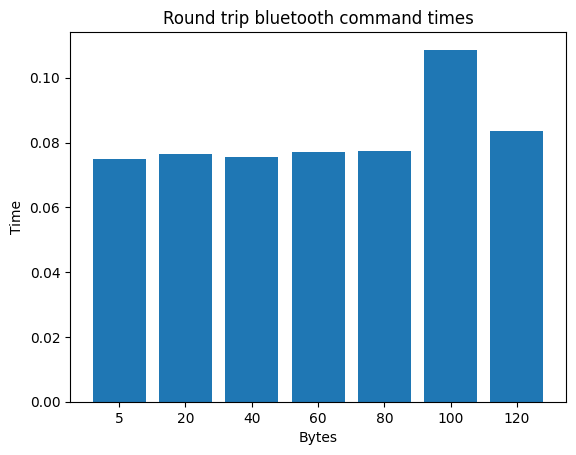

2025-01-28 16:28:53,726 | INFO     |: Disconnected from 1EFFEDB9-73BA-9396-D724-47E443C12C76


In [33]:

import matplotlib.pyplot as plt
import numpy as np

bytenum = ["5", "20", "40", "60", "80", "100", "120"]

plt.bar(bytenum, times)
plt.title('Round trip bluetooth command times')
plt.xlabel('Bytes')
plt.ylabel('Time')
plt.show()

## Reliability Test

In [20]:
contlist = []
def time_array_handler(uuid, bytearr):
    i = ble.bytearray_to_float(bytearr)
    #print(i, end=" ")
    contlist.append(i)


ble.start_notify(ble.uuid['RX_FLOAT'], time_array_handler)
#Start continuously sending ints
ble.send_command(CMD.INT_LOOP, "")


In [23]:
#Takes significantly longer to unpack characteristics than to send them, so ends up not being live time due to large data backlog
#May be because a buffer is storing the message and the bluetooth operation is only occuring now

for i in range(len(contlist)):
    if (i < len(contlist) - 1):
        #print(i, end=" ")
        if (abs(contlist[i+1]-contlist[i]) > 1):
            print("Discontinuity at ", i)
print(len(contlist))

212


In [7]:
ble.send_command(CMD.INT_LOOP, "")

In [8]:
for i in range(100000):
    s = ble.receive_float(ble.uuid['RX_FLOAT'])
    print(s)

9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0
9999.0


KeyboardInterrupt: 

In [13]:
#optional to stop notifications
ble.stop_notify(ble.uuid['RX_FLOAT'])

ValueError: Characteristic notification never started

In [14]:
ble.disconnect()

2025-02-03 18:10:15,036 | INFO     |: Disconnected from 1EFFEDB9-73BA-9396-D724-47E443C12C76
